In [1]:
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image

In [2]:
# gpu option. set 1 if available, else 0
gpu = 0          # needs large memory to run. so disabling for this tutorial.

# trained model file
model_fn = 'data/model.t7'

# running mean and variances of batch norm layers
bn_running_mean_fn = 'data/bn_mean.pkl'
bn_running_var_fn = 'data/bn_var.pkl'

# colour images
nChannel = 3     

# search range
disp_range = 128

# fixed seed for random variable generation.
# so that we get the same result when we run
# multiple times
torch.manual_seed(123)

In [3]:
class Net(nn.Module):    
    def __init__(self, nChannel):
        super(Net, self).__init__()                
        self.pad = nn.ReflectionPad2d(18)          #perform 18 pixel padding on the image on all sides.
        
        self.conv1 = nn.Conv2d(nChannel, 32, 5)    # first conv layer: 32 filters of size 5x5
        self.batchnorm1 = nn.BatchNorm2d(32, 1e-3) # first batch normalization layer
        
        self.conv2 = nn.Conv2d(32, 32, 5)          # second conv layer: 32 filters of size 5x5
        self.batchnorm2 = nn.BatchNorm2d(32, 1e-3) # second normalization layer
        
        self.conv3 = nn.Conv2d(32, 64, 5)          # third conv layer: 64 filters of size 5x5
        self.batchnorm3 = nn.BatchNorm2d(64, 1e-3) # third batch normalization layer
        
        self.conv4 = nn.Conv2d(64, 64, 5)          # fourth conv layer: 64 filters of size 5x5
        self.batchnorm4 = nn.BatchNorm2d(64, 1e-3) # fourth batch normalization layer
        
        self.conv5 = nn.Conv2d(64, 64, 5)          # fifth conv layer: 64 filters of size 5x5
        self.batchnorm5 = nn.BatchNorm2d(64, 1e-3) # fifth batch normalization layer
        
        self.conv6 = nn.Conv2d(64, 64, 5)          # sixth conv layer: 64 filters of size 5x5
        self.batchnorm6 = nn.BatchNorm2d(64, 1e-3) # sixth batch normalization layer
        
        self.conv7 = nn.Conv2d(64, 64, 5)          # seventh conv layer: 64 filters of size 5x5
        self.batchnorm7 = nn.BatchNorm2d(64, 1e-3) # seventh batch normalization layer
        
        self.conv8 = nn.Conv2d(64, 64, 5)          # eighth conv layer: 64 filters of size 5x5
        self.batchnorm8 = nn.BatchNorm2d(64, 1e-3) # eigth batch normalization layer        
            
        self.conv9 = nn.Conv2d(64, 64, 5)          # ninth conv layer: 64 filters of size 5x5
        self.batchnorm9 = nn.BatchNorm2d(64, 1e-3) # ninth batch normalization layer                                
        
        
    def forward(self, x):
        
        x = self.pad(x)                
        x = self.conv1(x)                
        x = F.relu(self.batchnorm1(x))
        
        x = self.conv2(x)
        x = F.relu(self.batchnorm2(x))
        
        x = self.conv3(x)
        x = F.relu(self.batchnorm3(x))
        
        x = self.conv4(x)
        x = F.relu(self.batchnorm4(x))
        
        x = self.conv5(x)
        x = F.relu(self.batchnorm5(x))
        
        x = self.conv6(x)
        x = F.relu(self.batchnorm6(x))
        
        x = self.conv7(x)
        x = F.relu(self.batchnorm7(x))
        
        x = self.conv8(x)
        x = F.relu(self.batchnorm8(x))
        
        x = self.conv9(x)
        x = self.batchnorm9(x)
                
        return x       
        

In [4]:
#loading    
net = Net(nChannel)
net.load_state_dict(torch.load(model_fn))
net.eval()
print(net)

Net (
  (pad): ReflectionPad2d (18, 18, 18, 18)
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (batchnorm1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (batchnorm2): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (batchnorm3): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True)
  (conv4): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (batchnorm4): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True)
  (conv5): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (batchnorm5): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True)
  (conv6): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (batchnorm6): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True)
  (conv7): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (batchnorm7): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True)
  (conv8): Conv2d(64, 64, kernel_siz

In [5]:
if gpu:
    net = net.cuda()

In [6]:
# set batch norm running mean and variance parameters..
bn_mean, bn_var = torch.load(bn_running_mean_fn), torch.load(bn_running_var_fn)

if gpu:
    for i in range(9):
        bn_mean[i], bn_var[i] = bn_mean[i].cuda(), bn_var[i].cuda()

net.batchnorm1.running_mean, net.batchnorm1.running_var = bn_mean[0], bn_var[0]
net.batchnorm2.running_mean, net.batchnorm2.running_var = bn_mean[1], bn_var[1]
net.batchnorm3.running_mean, net.batchnorm3.running_var = bn_mean[2], bn_var[2]
net.batchnorm4.running_mean, net.batchnorm4.running_var = bn_mean[3], bn_var[3]
net.batchnorm5.running_mean, net.batchnorm5.running_var = bn_mean[4], bn_var[4]
net.batchnorm6.running_mean, net.batchnorm6.running_var = bn_mean[5], bn_var[5]
net.batchnorm7.running_mean, net.batchnorm7.running_var = bn_mean[6], bn_var[6]
net.batchnorm8.running_mean, net.batchnorm8.running_var = bn_mean[7], bn_var[7]
net.batchnorm9.running_mean, net.batchnorm9.running_var = bn_mean[8], bn_var[8]

In [7]:
# some functions to dispay images and disparity maps in ipython notebook

import numpy as np
from cStringIO import StringIO
import IPython.display

def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))
    
#convert disparity to colour image
def disparity_to_color(I):
    
    _map = np.array([[0,0, 0, 114], [0, 0, 1, 185], [1, 0, 0, 114], [1, 0, 1, 174], 
                    [0, 1, 0, 114], [0, 1, 1, 185], [1, 1, 0, 114], [1, 1, 1, 0]]
                   )      
    max_disp = 1.0*I.max()
    I = np.minimum(I/max_disp, np.ones_like(I))
    
    A = I.transpose()
    num_A = A.shape[0]*A.shape[1]
    
    bins = _map[0:_map.shape[0]-1,3]    
    cbins = np.cumsum(bins)    
    cbins_end = cbins[-1]
    bins = bins/(1.0*cbins_end)
    cbins = cbins[0:len(cbins)-1]/(1.0*cbins_end)
    
    A = A.reshape(1,num_A)            
    B = np.tile(A,(6,1))        
    C = np.tile(np.array(cbins).reshape(-1,1),(1,num_A))
       
    ind = np.minimum(sum(B > C),6)
    bins = 1/bins
    cbins = np.insert(cbins, 0,0)
    
    A = np.multiply(A-cbins[ind], bins[ind])   
    K1 = np.multiply(_map[ind,0:3], np.tile(1-A, (3,1)).T)
    K2 = np.multiply(_map[ind+1,0:3], np.tile(A, (3,1)).T)
    K3 = np.minimum(np.maximum(K1+K2,0),1)
    
    return np.reshape(K3, (I.shape[1],I.shape[0],3)).T

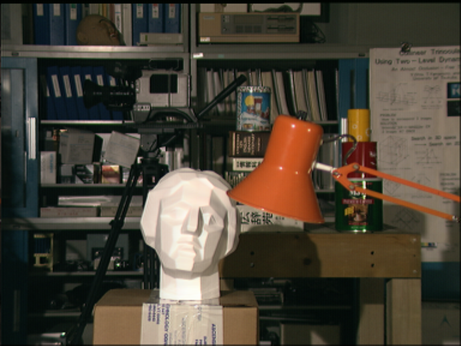

IOError: [Errno 2] No such file or directory: 'data/imgR.png'

In [10]:
# testing

# left image
#left_image_fn = 'data/kitti2015_000000_10_L.png'    
left_image_fn = 'data/imgL.png'

# right image
#right_image_fn = 'data/kitti2015_000000_10_R.png'   
right_image_fn = 'data/imgR.png'

# display left and right images
showarray(Image.open(left_image_fn))
showarray(Image.open(right_image_fn))


# read images into tensor
l_img = 255*transforms.ToTensor()(Image.open(left_image_fn))
r_img = 255*transforms.ToTensor()(Image.open(right_image_fn))


# normalize images
l_img = (l_img -l_img.mean())/(l_img.std())
r_img = (r_img -r_img.mean())/(r_img.std())

img_h = l_img.size(1)
img_w = l_img.size(2)
print 'Image size:', img_h, img_w

# convert to batch x channel x height x width format
l_img = l_img.view(1, l_img.size(0), l_img.size(1), l_img.size(2))
r_img = r_img.view(1, r_img.size(0), r_img.size(1), r_img.size(2))

if gpu:
    l_img = l_img.cuda()
    r_img = r_img.cuda()

# forward pass. extract deep features
left_feat = net(Variable(l_img,volatile=True))
right_feat = net(Variable(r_img,volatile=True))

# correlation in deep feature space
output = torch.Tensor(img_h, img_w, disp_range).zero_() 
if gpu:
    output = output.cuda()
    
end_id = img_w-1
for loc_idx in range(disp_range):               
        l = left_feat[:,:,:,loc_idx:end_id]
        r = right_feat[:,:,:,0:end_id-loc_idx] 
        p = torch.mul(l,r)         # elementwise multiply 64 dimensional feature   
        q = torch.sum(p, 1)        # and add                 
        output[:,loc_idx:end_id,loc_idx] = q.data.view(q.data.size(2), q.data.size(3))                                    

max_disp, pred = torch.max(output,2)
pred = pred.view(output.size(0),output.size(1))

color_map = disparity_to_color(pred.float().numpy())
showarray(255*np.transpose(color_map, axes=[1,2,0]))